# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### What characteristics make a car more or less attractive to prospective buyers?
### How to optimize profit for those car with the valued characteristics?
### How to re-strategize marketing to improve sales of cars with these valued characteristics? 


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Initial Data Inspection and Data Cleaning

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn import set_config

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
import warnings
from sklearn import set_config

warnings.filterwarnings("ignore")

set_config(display="diagram")

In [374]:
vehicles = pd.read_csv('data/vehicles.csv')
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
pd.set_option('display.max_columns', None)
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
vehicles[vehicles['price'] == 0]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


In [387]:
vdf = vehicles[vehicles['price'] != 0]
df = vdf.dropna()

In [388]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32496 entries, 215 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32496 non-null  int64  
 1   region        32496 non-null  object 
 2   price         32496 non-null  int64  
 3   year          32496 non-null  float64
 4   manufacturer  32496 non-null  object 
 5   model         32496 non-null  object 
 6   condition     32496 non-null  object 
 7   cylinders     32496 non-null  object 
 8   fuel          32496 non-null  object 
 9   odometer      32496 non-null  float64
 10  title_status  32496 non-null  object 
 11  transmission  32496 non-null  object 
 12  VIN           32496 non-null  object 
 13  drive         32496 non-null  object 
 14  size          32496 non-null  object 
 15  type          32496 non-null  object 
 16  paint_color   32496 non-null  object 
 17  state         32496 non-null  object 
dtypes: float64(2), int64(2)

### Univariate Data Visualizations 

In [9]:
#Price Distribution with Distribution Plot - Defined own function 
def plot_dist(df, xlabel, title): 

    # created the plot
    sns.displot(df, color='green', edgecolor='blue')
    sns.set(style="whitegrid")

    # rotate and set the x-axis label
    plt.xticks(rotation=90)
    plt.xlabel(xlabel, fontsize = 12)
    
    
    # title
    plt.title(title, fontsize = 14)

    # show the plot
    plt.show()

 

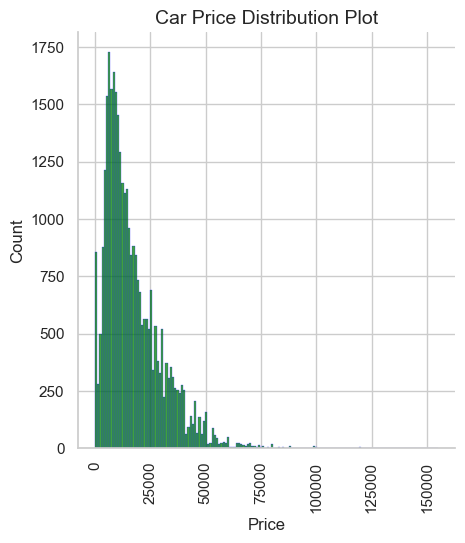

In [11]:
plot_dist(df['price'], 'Price','Car Price Distribution Plot')

#### Price is heavily skewed towards the lower price range of cars, around 20,000-40,000. Distribution plot portrays a right-skewed shape. 

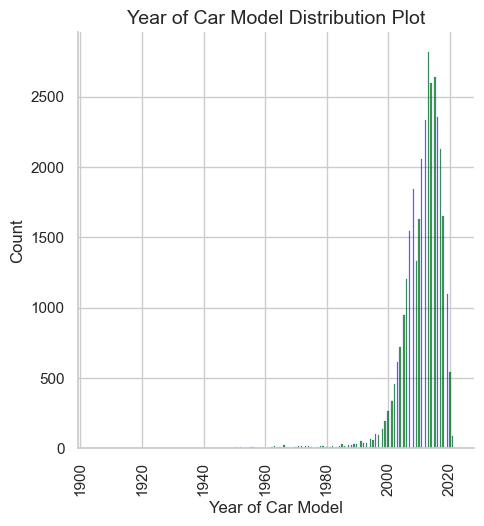

In [14]:
#Year of Car Model Distribution Plot

plot_dist(df['year'], 'Year of Car Model','Year of Car Model Distribution Plot')

##### Year of the Car Model distribution plot is skewed towards models made in 2000-2020. The plot is left-skewed. 

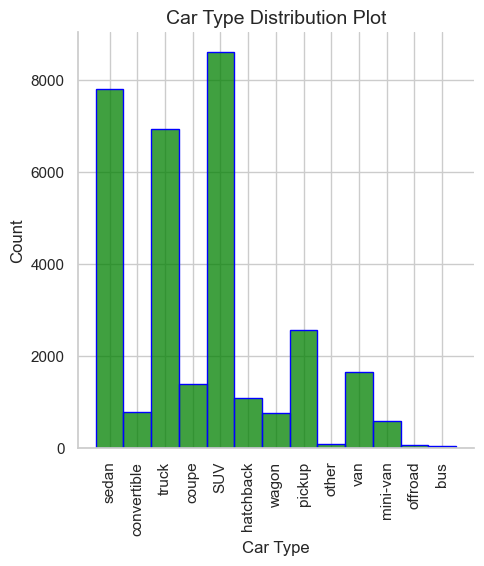

In [17]:
#Car Type Distribution Plot
plot_dist(df['type'], 'Car Type','Car Type Distribution Plot')

#### The distribution plot demonstrates that SUV, truck, and sedan car types are the most popular car types.

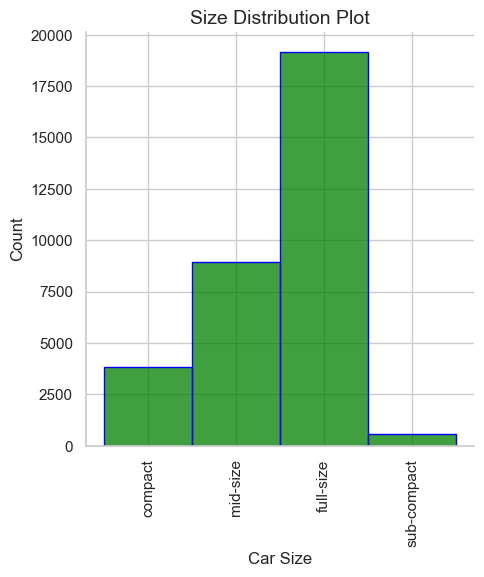

In [20]:
#Size Distribution Plot

plot_dist(df['size'],'Car Size','Size Distribution Plot')

#### Full-size models are the most popular among other sizes. 

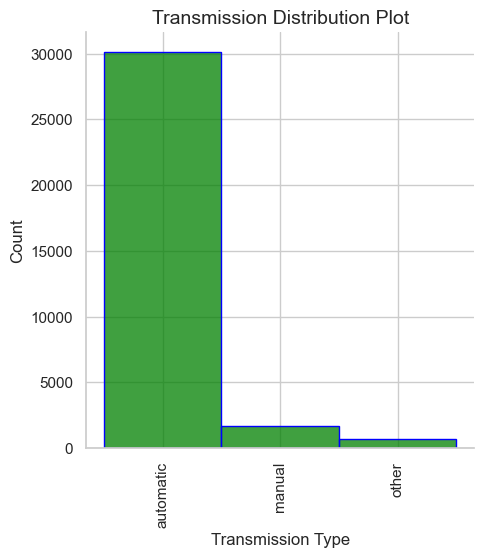

In [23]:
#Transmission Distribution Plot 

plot_dist(df['transmission'], 'Transmission Type','Transmission Distribution Plot')

#### Automatic is clearly the most common transmission type amongst used cars. 

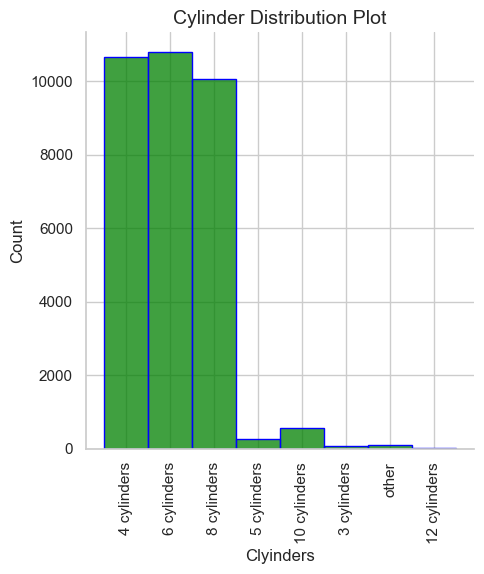

In [26]:
#Car Cylinder Distribution Plot 

plot_dist(df['cylinders'], 'Clyinders','Cylinder Distribution Plot')

#### Four, six, and eight cylinder cars are the most common amongst used cars. 

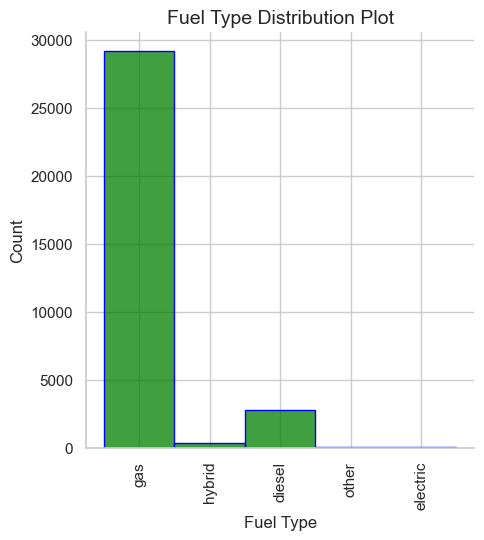

In [29]:
# Fuel Distribution Plot

plot_dist(df['fuel'], 'Fuel Type','Fuel Type Distribution Plot')

#### Gas is clearly the most common fuel type amongst used cars.

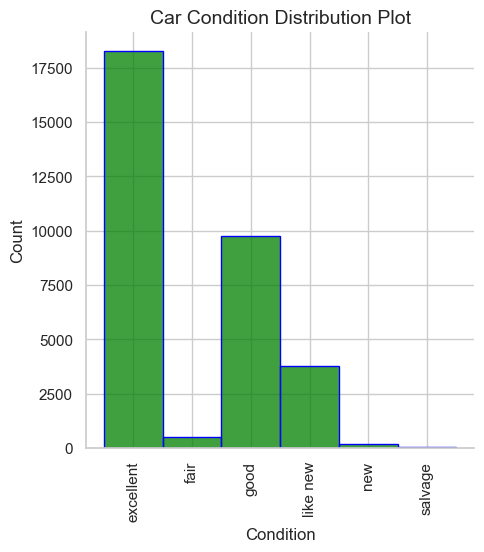

In [32]:
# Car Condition Distribution Plot 

plot_dist(df['condition'],'Condition', 'Car Condition Distribution Plot')

#### Excellent, good, and like new were the most common conditions amongst used cars. 

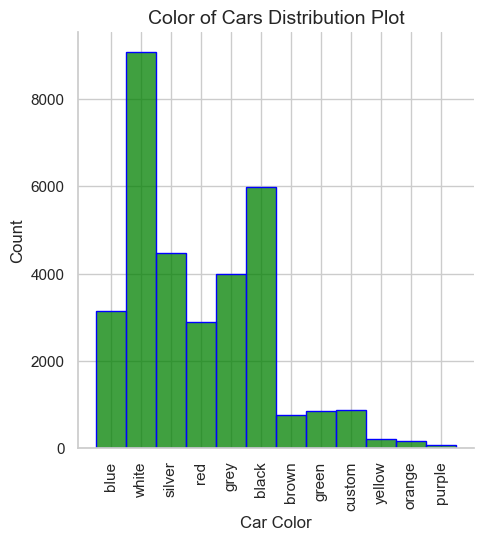

In [457]:
# Paint Color Plot
plot_dist(df['paint_color'], 'Car Color','Color of Cars Distribution Plot')

#### White, silver, and black are the most popular colors for used cars. Grey, red, and blue are the second most popular colors. Brown, green, and custom are the third most popular colors. Yellow, orange, and purple are the least popular colors. 

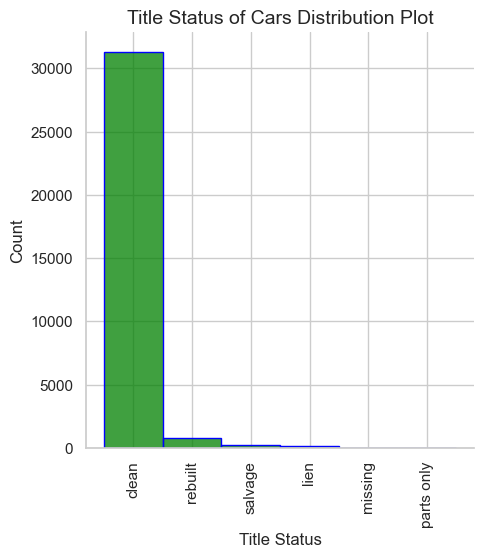

In [458]:
#Title Status Distribution Plot

plot_dist(df['title_status'], 'Title Status','Title Status of Cars Distribution Plot')

#### Clean is the most common title-status. 

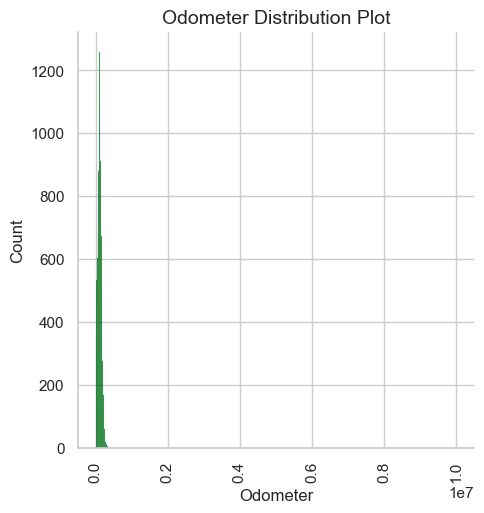

In [446]:
#Odometer Distribution Plot
plot_dist(df['odometer'], 'Odometer','Odometer Distribution Plot')

#### Odometer is mostly under 0.1e7. 

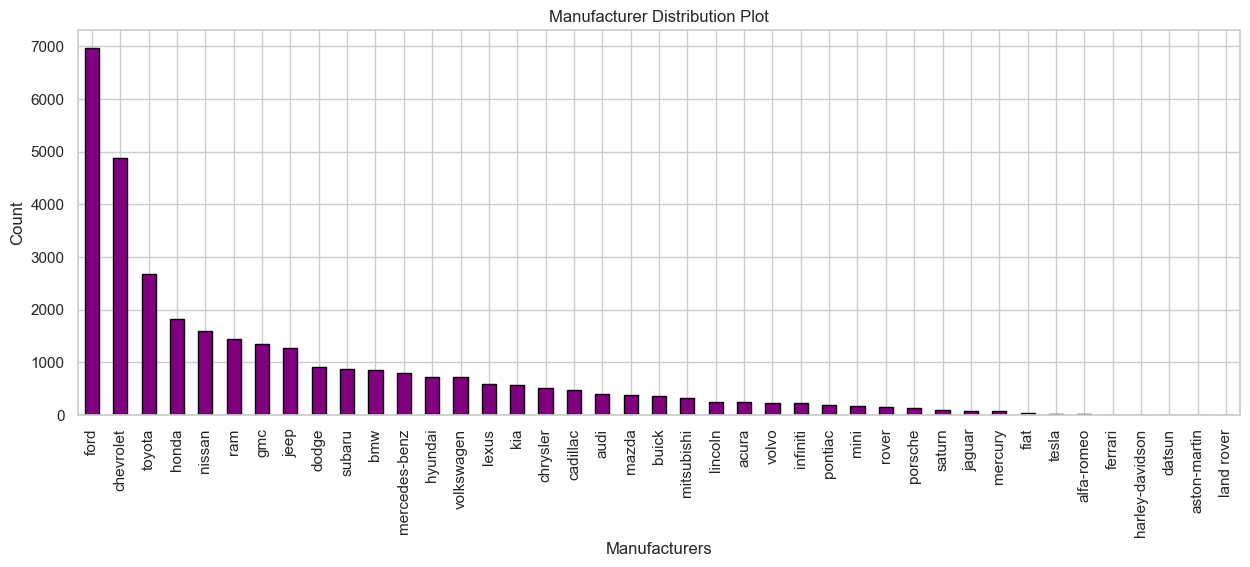

In [343]:
#Bar Graph of Manufacturers

df['manufacturer'].value_counts().sort_values(ascending= False).plot(kind='bar', color = 'purple', edgecolor = 'black',figsize=(15, 5))
plt.title('Manufacturer Distribution Plot')
plt.xlabel('Manufacturers')
plt.ylabel('Count')
plt.show()


#### Ford, Chevrolet, and Toyota are the top manfacturers. 

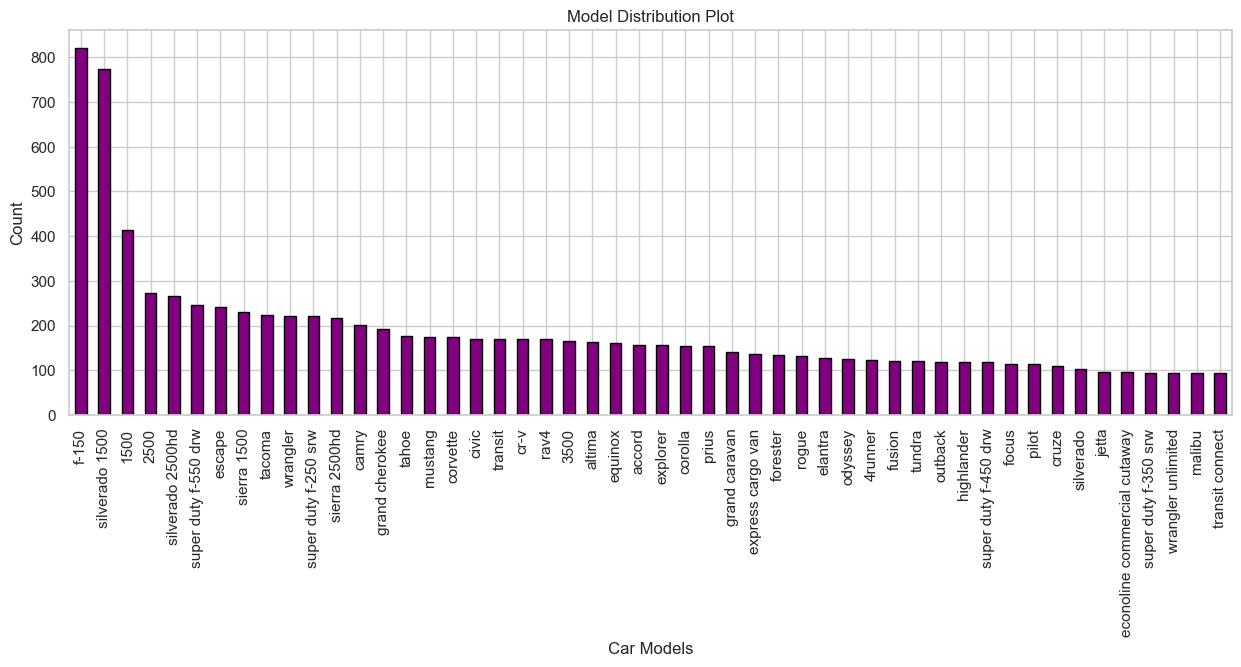

In [342]:
#Bar Graph of Model

df['model'].value_counts().sort_values(ascending= False).head(50).plot(kind='bar', color = 'purple', edgecolor = 'black',figsize=(15, 5))
plt.title('Model Distribution Plot')
plt.xlabel('Car Models')
plt.ylabel('Count')
plt.show()



#### F-150, Silverado 1500, and 1500 are the top car models. 

## Multivariate Data Visualizations

In [104]:
#Defined Linear Regression Plot Function
def plot_reg(df, x, y, xlabel, ylabel, title): 

    # Set the style and color palette of the plot
    sns.set(style="whitegrid")
    sns.set_palette("deep")  

    # Create the linear regression plot
    sns.regplot(x=x, y=y, data=df, line_kws=dict(color="r")) 

    # Set the title and labels
    plt.title(title)  
    plt.xlabel(xlabel, fontsize=12) 
    plt.ylabel(ylabel, fontsize=12)  
    plt.xticks(rotation=90)

    # Show plot
    plt.show()


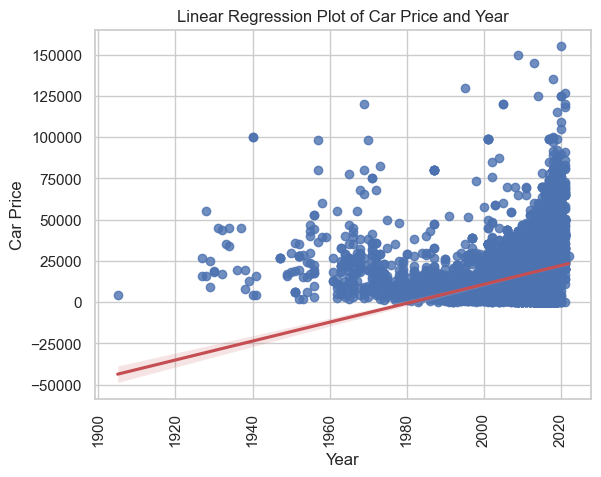

In [392]:
plot_reg(df, 'year','price','Year','Car Price','Linear Regression Plot of Car Price and Year')

#### Linear regression plot demonstrates an overall increasing in car prices since 1900-2020. Although, the negative prices are odd, it still represent an overall increasing trend.

In [102]:
#Defined Scatterplot Function
def plot_scatter(df, x, y, xlabel, ylabel, title, hue = None, alpha = 0.7): 

    # Set the style and color palette of the plot
    sns.set(style="whitegrid")
    sns.set_palette("deep")  

    # Create the scatter plot
    sns.scatterplot(x=x, y=y, data=df, hue = hue, alpha=alpha)  

    # Set the title and labels
    plt.title(title)  
    plt.xlabel(xlabel, fontsize=12)  
    plt.ylabel(ylabel, fontsize=12)  
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()


In [149]:
#Defined Barplot Function

def plot_bar(df, x, y, xlabel, ylabel, title, alpha = 0.7, figsize=(15, 5)):

    # Set the style and color palette of the plot
    sns.set(style="whitegrid")
    sns.set_palette("pastel") 
    
    #barplot
    sns.barplot(x=x, y=y, data=df, alpha = alpha)  

    # Set the title and labels
    plt.title(title)  
    plt.xlabel(xlabel, fontsize=12)  
    plt.ylabel(ylabel, fontsize=12)  
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

In [188]:
#Defined Boxplot Function
def plot_box(df, x, y, xlabel, ylabel, title, hue = None, figsize= (12,16)): 

    # Set the style and color palette of the plot
    sns.set(style="whitegrid")
    sns.set_palette("deep")  

    # Create the scatter plot
    sns.boxplot(x=x, y=y, data=df, hue = hue)  

    # Set the title and labels
    plt.title(title)  
    plt.xlabel(xlabel, fontsize=9)  
    plt.ylabel(ylabel, fontsize=9) 
    plt.xticks(rotation=90)

    # Show the plot 
    plt.show()

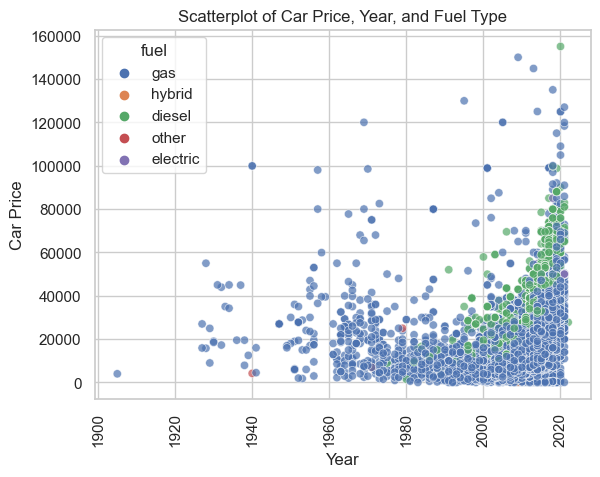

In [211]:
plot_scatter(df,'year','price','Year','Car Price','Scatterplot of Car Price, Year, and Fuel Type', 'fuel')

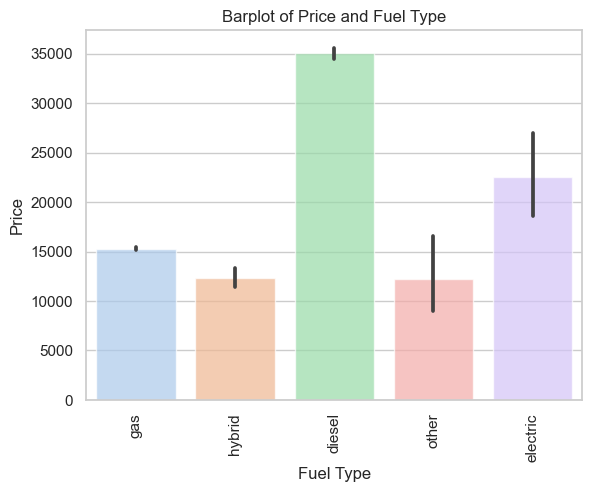

In [217]:
plot_bar(df, 'fuel', 'price', 'Fuel Type', 'Price', 'Barplot of Price and Fuel Type')

#### Fuel is the most significant driver in car price, in terms of the fuel type and car price relationship.

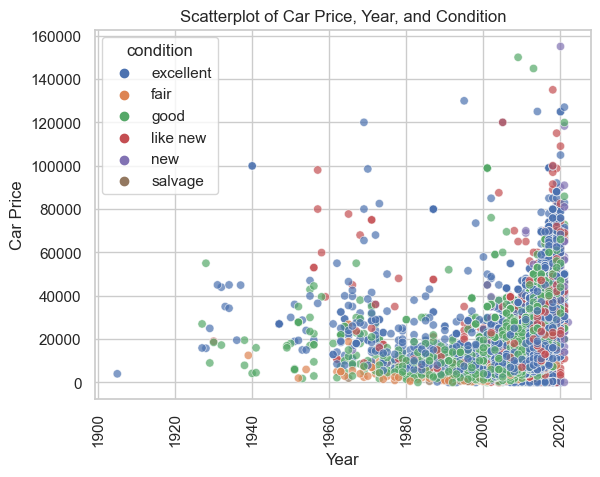

In [213]:
plot_scatter(df,'year','price','Year','Car Price','Scatterplot of Car Price, Year, and Condition', 'condition')

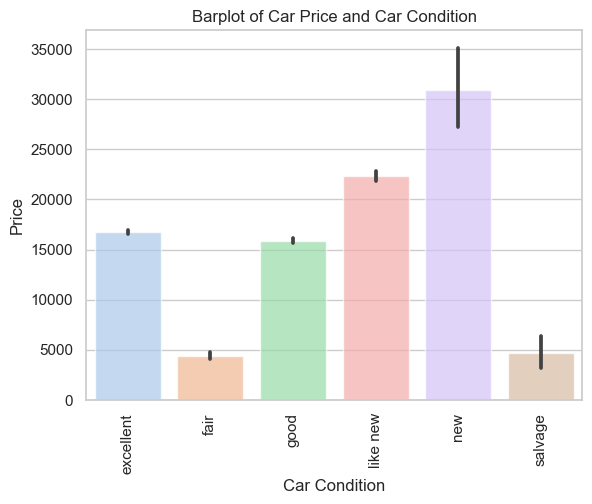

In [447]:
plot_bar(df, 'condition', 'price', 'Car Condition', 'Price', 'Barplot of Car Price and Car Condition')
    

#### New was the most significant drver in car price, in terms of the car condition and car price relationship.

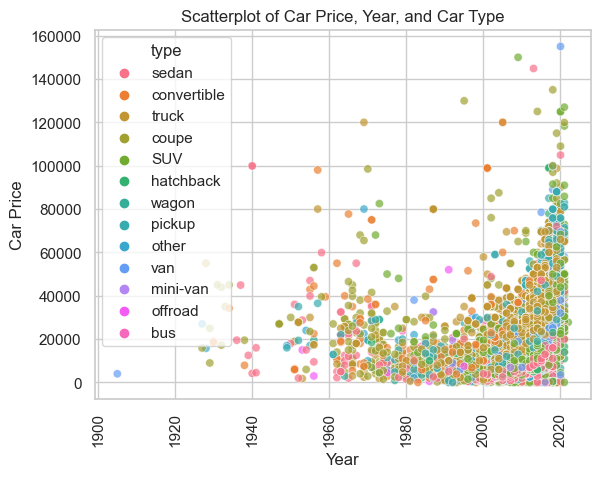

In [219]:
plot_scatter(df,'year','price','Year','Car Price','Scatterplot of Car Price, Year, and Car Type', 'type')

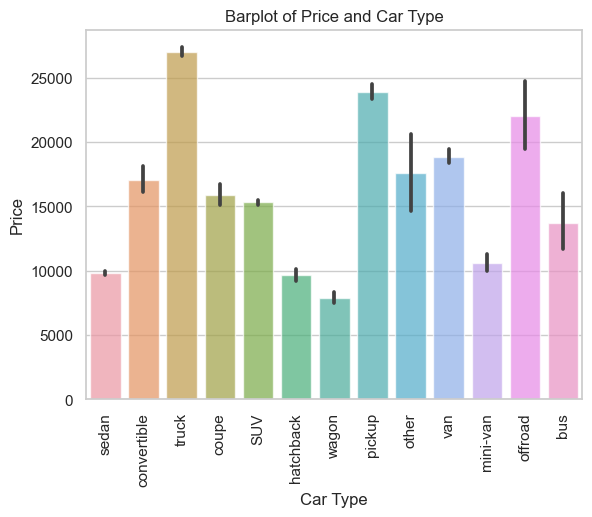

In [221]:
plot_bar(df, 'type', 'price', 'Car Type', 'Price', 'Barplot of Price and Car Type')


#### Truck, pickup, and offroad are the most significant drivers in car price, in terms of the car type and car price relationship.

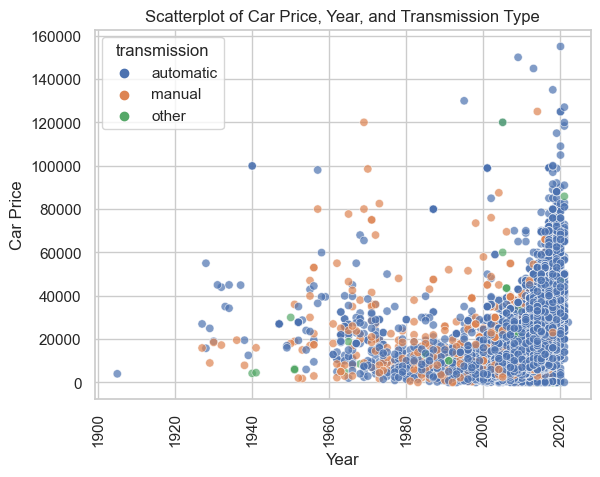

In [222]:
plot_scatter(df,'year','price','Year','Car Price','Scatterplot of Car Price, Year, and Transmission Type', 'transmission')

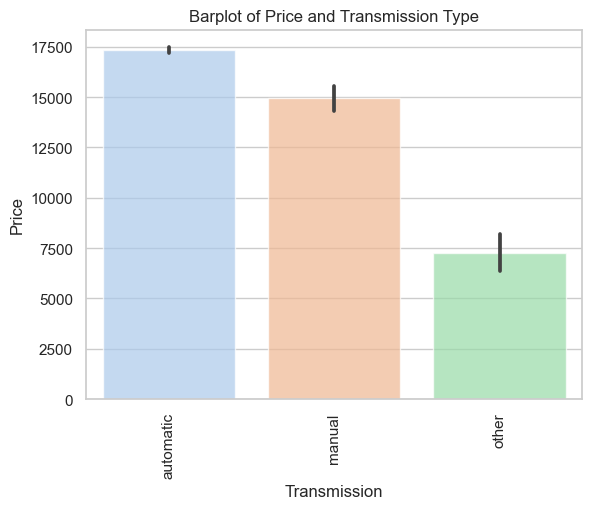

In [223]:
plot_bar(df, 'transmission', 'price', 'Transmission', 'Price', 'Barplot of Price and Transmission Type')


####  Automatic transmission is the most significant driver in car price, in terms of the transmission type and car price relationship.

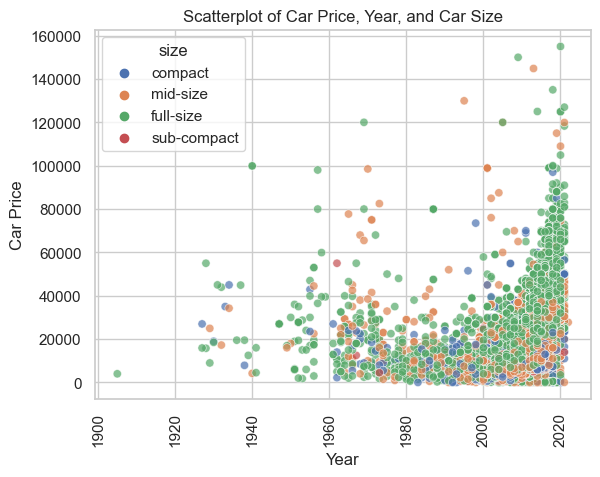

In [225]:
plot_scatter(df,'year','price','Year','Car Price','Scatterplot of Car Price, Year, and Car Size', 'size')

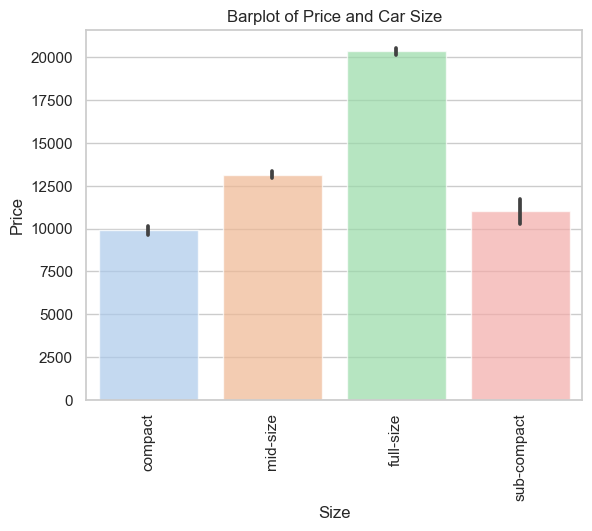

In [226]:
plot_bar(df, 'size', 'price', 'Size', 'Price', 'Barplot of Price and Car Size')


####  Full-size cars are the most significant drivers in car price, in terms of the car size and car price relationship.

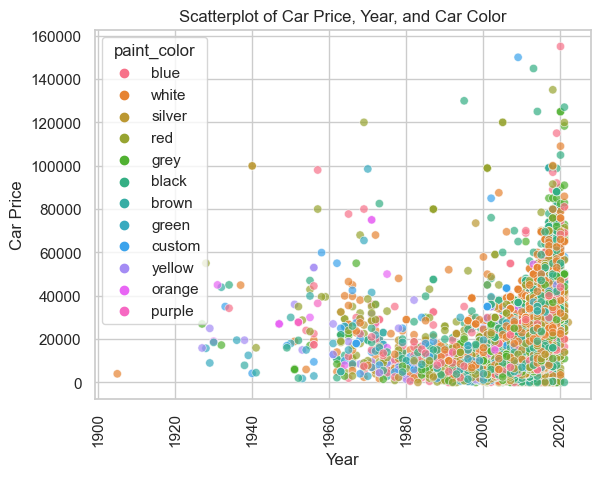

In [247]:
plot_scatter(df,'year','price','Year','Car Price','Scatterplot of Car Price, Year, and Car Color', 'paint_color')

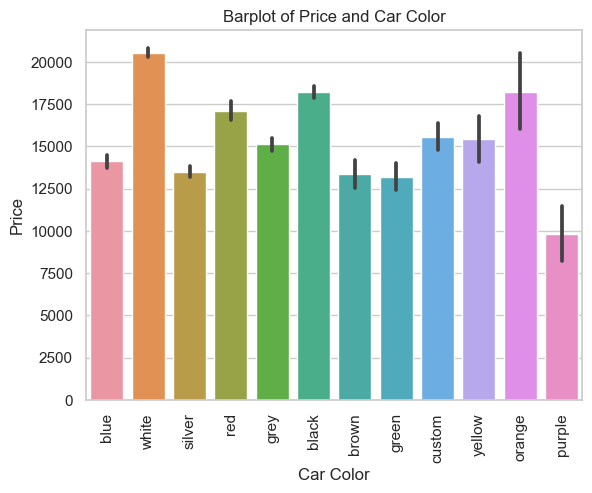

In [248]:
plot_bar(df, 'paint_color', 'price', 'Car Color', 'Price', 'Barplot of Price and Car Color')

####  White, red, black, and orange are the most significant drivers in car price, in terms of the car color and car price relationship.

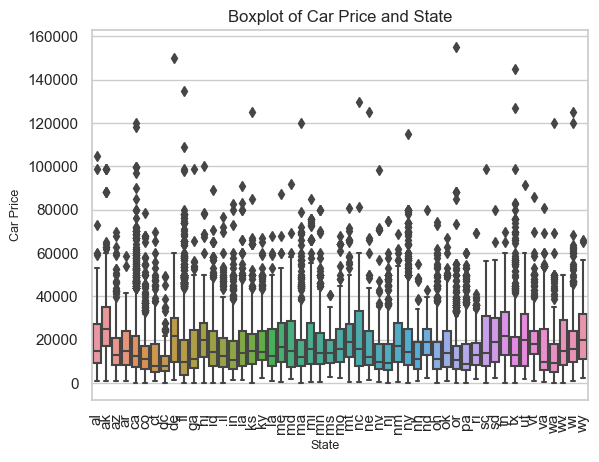

In [189]:
plot_box(df,'state','price','State','Car Price','Boxplot of Car Price and State')

#### States like Arkansas, Florida, North Carolina, New Mexico, South Carolina, and Utah have a higher car prices.

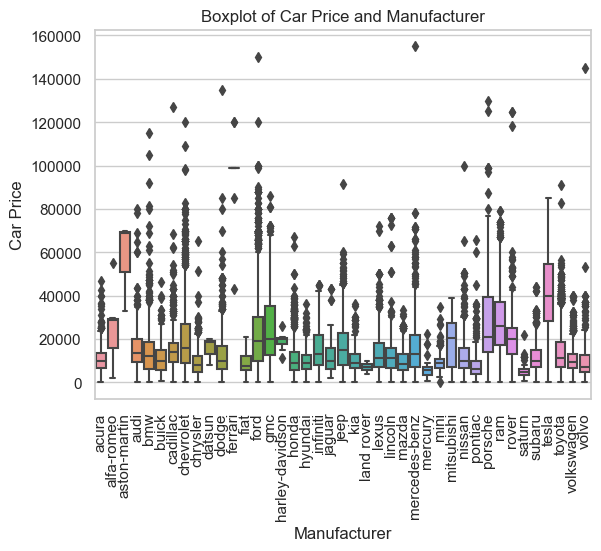

In [242]:
plot_box(df.sort_values(by = 'manufacturer'),'manufacturer','price','Manufacturer','Car Price','Boxplot of Car Price and Manufacturer')

#### Aston-Martin, Ford, GMC, Porsche, Ram, and Tesla are the car manufacturers with the highest price distribution.

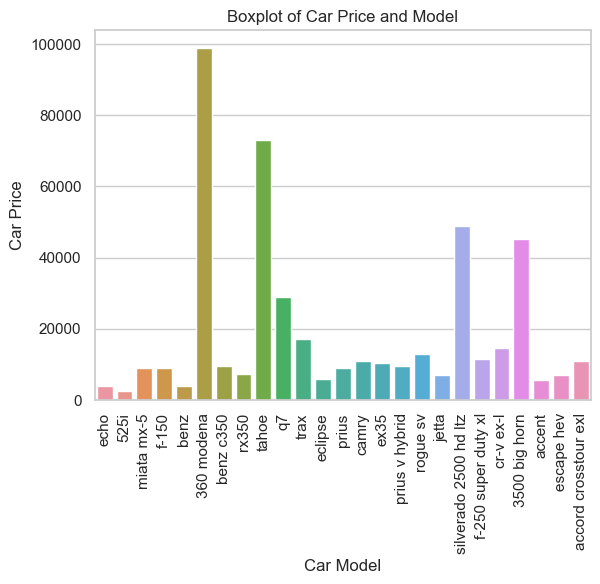

In [251]:
plot_bar(df.head(25),'model','price','Car Model','Car Price','Boxplot of Car Price and Model')

#### There are a select few car models are in the higher price ranges for the top 25 car models.

## Hypothesis: Year, model, manufacturer, and car type seem like the most influential factors that impact car prices.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Removing unncessary variables/values 

In [288]:
#These columns were not very informative to me, so I am choosing to remove them.

car_df = df.drop( columns = ['VIN', 'region', 'id'], axis = 1)
car_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
338,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy


In [289]:
#Remove the parts only value from the title_status column

#Parts-only means junk cars with only a few operational parts, they are not able to be driven. Therefore,
#they will be removed from the column. 

car_df = car_df.query('title_status != "parts only"')
car_df['title_status']

215       clean
219       clean
268       clean
337       clean
338       clean
          ...  
426785    clean
426788    clean
426792    clean
426793    clean
426833    clean
Name: title_status, Length: 32494, dtype: object

### Create a more recent time period for used cars 

In [290]:
#Focus on a more recent/modern time period for analysis 
car_df =  car_df.query('year > 2000 and year <= 2020')
car_df.head(50)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
346,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,rwd,mid-size,convertible,red,al
355,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,al
364,7300,2007.0,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,al
366,28900,2017.0,audi,q7,good,6 cylinders,gas,94601.0,clean,automatic,4wd,full-size,SUV,white,al
367,17000,2019.0,chevrolet,trax,good,4 cylinders,gas,14898.0,clean,automatic,4wd,full-size,SUV,grey,al
370,5950,2007.0,mitsubishi,eclipse,good,4 cylinders,gas,72000.0,clean,manual,fwd,compact,hatchback,black,al
373,8900,2013.0,toyota,prius,excellent,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al


### Upon doing some domain research, I found that a majority of used-cars in the United States are sold for under 40,000 dollars. Aditionally, my Car Distribution Plot in the Univariate analysis demonstrate that most of cars ranged from 20,000-40,0000 dollars. I feel that it would be more useful for the used-car dealership to tailor the price column to under 40,000 dollars. Since this is a used-car dealership, it is best to present a practical representation of data in current times. 

#### Sources: https://www.statista.com/statistics/274928/used-vehicle-average-selling-price-in-the-united-states/#:~:text=In%202022%2C%20the%20average%20selling,expensive%20than%20used%20light%20vehicles, https://www.statista.com/statistics/1267409/us-used-vehicles-average-list-price/#:~:text=The%20average%20list%20price%20for,at%20under%2028%2C100%20U.S.%20dollars.

In [291]:
#Focusing on price, removing really low prices and prices that are too high for used cars

In [292]:
car_df['price'].min()

1

In [293]:
car_df['price'].max()

155000

In [294]:
car_df = car_df.query('price > 100 and price < 40000')
car_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
355,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,al
364,7300,2007.0,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,24995,2014.0,gmc,sierra,good,8 cylinders,gas,128722.0,clean,automatic,4wd,full-size,truck,white,wy
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy


In [295]:
#making the state column uppercase 

car_df['state']= car_df['state'].str.upper()
car_df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,AL
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,AL
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,AL
355,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,AL
364,7300,2007.0,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426784,24995,2014.0,gmc,sierra,good,8 cylinders,gas,128722.0,clean,automatic,4wd,full-size,truck,white,WY
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,WY
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,WY
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,WY


### Splitting the dataset to prepare for Regression Models 

In [296]:
#Creating the train/test split 

X = car_df.drop(['price'], axis = 1)
y = car_df['price']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [298]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19882 entries, 51080 to 355099
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          19882 non-null  float64
 1   manufacturer  19882 non-null  object 
 2   model         19882 non-null  object 
 3   condition     19882 non-null  object 
 4   cylinders     19882 non-null  object 
 5   fuel          19882 non-null  object 
 6   odometer      19882 non-null  float64
 7   title_status  19882 non-null  object 
 8   transmission  19882 non-null  object 
 9   drive         19882 non-null  object 
 10  size          19882 non-null  object 
 11  type          19882 non-null  object 
 12  paint_color   19882 non-null  object 
 13  state         19882 non-null  object 
dtypes: float64(2), object(12)
memory usage: 2.3+ MB


In [299]:
categorical = X_train.select_dtypes(include = ['object']).columns.tolist()
categorical

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [450]:
categorical_variables = X_train.select_dtypes(include='object').columns.tolist()

pd.DataFrame(categorical_variables, columns=['categorical variables'])

,categorical variables
0,manufacturer
1,model
2,condition
3,cylinders
4,fuel
5,title_status
6,transmission
7,drive
8,size
9,type


In [301]:
numerical = X_train.select_dtypes(include = ['number']).columns.tolist()
numerical

['year', 'odometer']

In [449]:
numerical_variables = X_train.select_dtypes(include = 'number').columns.tolist()
pd.DataFrame(numerical_variables, columns=['numerical variables'])

,numerical variables
0,year
1,odometer


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Ridge Regression Modeling and Linear Regression Modeling with GridSearchCV

#### Ridge Regression Model with GridSearchCV

In [302]:
#Create a Ridge Model through GridSearchCV

#Creating the Parameter Gird 

ridge_param_dict = {'model__alpha': [0.1, 1.0, 10.0,100.0, 1000.0],
                   'model__normalize': [True, False]
}

#Creating the Column Transformers
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
numeric_preprocessor = StandardScaler()


transformers = make_column_transformer(
    (categorical_preprocessor, categorical),
    (numeric_preprocessor, numerical)
)

transformers 



ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['manufacturer', 'model', 'condition',
                                  'cylinders', 'fuel', 'title_status',
                                  'transmission', 'drive', 'size', 'type',
                                  'paint_color', 'state']),
                                ('standardscaler', StandardScaler(),
                                 ['year', 'odometer'])])

In [303]:
# Ridge Pipeline 

ridge_pipe = Pipeline([('transformers', transformers),('model', Ridge())])

ridge_grid = GridSearchCV(ridge_pipe, ridge_param_dict, verbose = 1)
ridge_grid

GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'model__normalize': [True, False]},
             verbose=1)

In [304]:
#Fit the Model 

ridge_grid.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'model__normalize': [True, False]},
             verbose=1)

In [460]:
#Trying out Best Parameter and Best Estimator
ridge_best_estimator = ridge_grid.best_estimator_
ridge_best_params = ridge_grid.best_params_

print(ridge_best_estimator)
print(ridge_best_params)
print(ridge_grid.cv_results_)


Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])])),
                ('model', Ridge(normalize=False))])
{'model__alpha': 1.0, 'model__normalize': False}
{'mean_fit_time': array([0.07879105, 0.11928644, 

### Linear Regression Model with GridSearchCV

In [306]:
# Linear Regression with GridSearchCV


lr_param_grid = {
    'lr_t__polynomialfeatures__degree': [2,3,4,5],
     'model__normalize': [True, False]
}



lr_t = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=np.object_)),
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (PolynomialFeatures(), make_column_selector(dtype_include=np.number)))

##I experienced some difficulty with trying to create a column transformer with a Linear Regression model and 
#GridSearchCV the same way I created the Ridge Regression. I tried a different way for this regression
#model and included Polynomial Features, and I was able to execute the regression this way. 
                    

In [307]:

pipe = Pipeline([('lr_t',lr_t),
                 ('model', LinearRegression())])
pipe

Pipeline(steps=[('lr_t',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d5b21190>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d56c8280>),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d56aafd0>)])),
                ('model', LinearRegression())])

In [308]:
lr_grid = GridSearchCV(pipe, lr_param_grid, cv=5,verbose = 1)

lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lr_t',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d5b21190>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d56c8280>),
                                                                        ('polynomialfeatures',
                                                                         PolynomialFeatures(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d56aafd0>)])),
                                       ('model', LinearRegression())]),
             param_grid={'lr_t__polynomialfeatures__degree': [2, 3, 4, 5],
                         'model__normalize': [True, False]},
             verbose=1)

In [309]:
lr_best_estimator = lr_grid.best_estimator_
lr_best_params = lr_grid.best_params_

In [459]:
print(lr_best_estimator)
print(lr_best_params)
print(lr_grid.cv_results_)

Pipeline(steps=[('lr_t',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d5b13f40>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d5b13d60>),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=3),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89d5b13790>)])),
                ('model', LinearRegression(normalize=True))])
{'lr_t__polynomialfeatures__degree': 3, 'model__normalize

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Evaluating the Ridge Regression Model

In [311]:
#Evaluating the Ridge/GridSearchCV Model


#Traint/Test MSE

r_train_preds = ridge_grid.predict(X_train)
r_test_preds = ridge_grid.predict(X_test)
train_mse = mean_squared_error(y_train, r_train_preds)
test_mse = mean_squared_error(y_test, r_test_preds)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Train MSE: 12667675.932542274
Test MSE: 15120815.224720752


In [393]:
#Train Score
ridge_grid.score(X_train, y_train)

0.8621338514900149

In [395]:
#Test Score
ridge_grid.score(X_test, y_test)

0.838582368732892

In [314]:
#R squared
r_2_score = ridge_best_estimator.score(X_test, y_test)
r_2_score

0.838582368732892

### Evaluating the Linear Regression Model

In [399]:
# Evaluating the Linear Regression/GridSearchCV Model

#Train MSE, Test MSE

lr_train_preds = lr_grid.predict(X_train)
lr_test_preds = lr_grid.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_train_preds)
lr_test_mse = mean_squared_error(y_test,lr_test_preds)

print(f'Train MSE: {lr_train_mse}')
print(f'Test MSE: {lr_test_mse}')

Train MSE: 9900456.86886536
Test MSE: 14049756.843581025


In [397]:
#Train Score
lr_grid.score(X_train, y_train)

0.8922503335048796

In [398]:
#Test Score
lr_grid.score(X_test, y_test)

0.8500161244043262

In [359]:
#R squared
r2_score_lr = lr_best_estimator.score(X_test, y_test)
r2_score_lr

0.8500161244043262

#### Both the Ride and Linear Regression Model had high R squared scores and were close to each other. Since, the Linear Regression model was higher, with an R-squared of 0.85 compared to 0.84, that is the best model overall and will be used for further analysis. High train and test MSE scores are expected given the very large dataset. R-squared values are a better measure for accuracy in this circumstance. A separate table will be used to summarize for the README file for the used-car dealership.

### Feature Importance Analysis 

#### Now, the most important features will be gathered through acquiring the coefficients from the Linear Regression model. Feature Importance Analysis and Permutation Importance Analysis will be both used to confirm the most important features for prospective buyers.

In [441]:
features = lr_best_estimator.named_steps['lr_t'].get_feature_names_out()
features

array(['onehotencoder__manufacturer_acura',
       'onehotencoder__manufacturer_alfa-romeo',
       'onehotencoder__manufacturer_audi', ...,
       'polynomialfeatures__year^2 odometer',
       'polynomialfeatures__year odometer^2',
       'polynomialfeatures__odometer^3'], dtype=object)

In [442]:
coefficient = lr_best_estimator.named_steps['model'].coef_
coefficient

array([-5.69022007e+02,  7.07875006e+02, -1.22494779e+02, ...,
       -8.98745085e-08,  1.40348364e-10, -2.35132751e-14])

In [443]:
coefs = pd.DataFrame({'coefficient': coefficient}, index = features).sort_values(by='coefficient')
coefs.reset_index(inplace=True)
coefs.rename(columns={'index': 'feature'}, inplace=True)
coefs

,feature,coefficient
0,standardscaler__year,-179404.918324
1,polynomialfeatures__year,-40016.479861
2,onehotencoder__model_malibu lt sedan,-28143.800457
3,onehotencoder__model_e400 4matic awd co,-24783.246566
4,onehotencoder__model_f-pace 20d prestige,-24412.363590
...,...,...
3718,onehotencoder__model_g 500,24387.752720
3719,onehotencoder__model_c4e042,25649.100498
3720,onehotencoder__model_m2,27348.031514
3721,onehotencoder__model_f-650,29730.761498


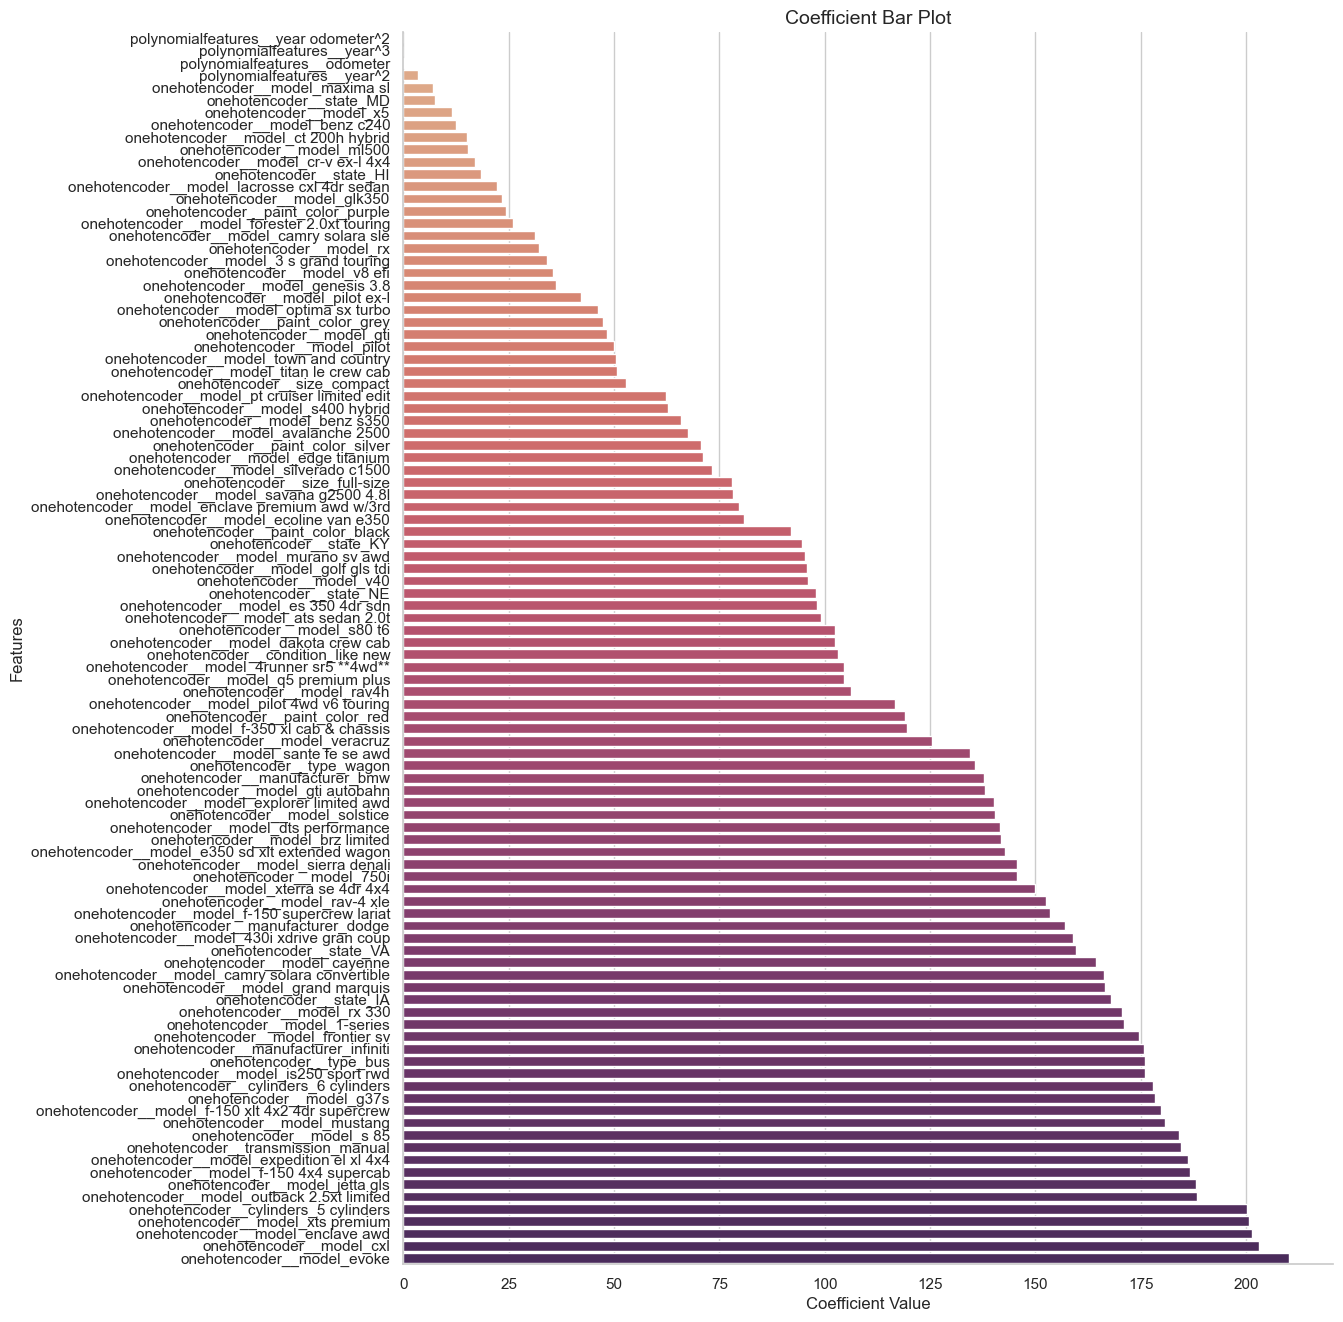

In [456]:
c_plot = coefs.query('coefficient > 0')
c_plot_75 = c_plot.head(100)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 16))
sns.barplot(x=c_plot_75['coefficient'], y=c_plot_75['feature'], palette='flare')
plt.title('Coefficient Bar Plot', fontsize = 14)
plt.xlabel('Coefficient Value',fontsize = 12)
plt.ylabel('Features',fontsize = 12)
sns.despine()
plt.show()

#### The Coefficient Bar Plot is demonstrating that certain car models have higher coefficient values. This is expected with my hypothesis. 

### Permutation Importance Analysis 

In [445]:
#Permutation Importance 
r = permutation_importance(lr_grid, X_test, y_test, n_repeats=30, random_state=22)

In [404]:
f_importances = pd.DataFrame(r.importances, index = X_test.columns).T
f_importances

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0.484512,0.045120,0.469581,0.002792,0.022919,0.033124,0.139795,0.009076,0.000383,0.025953,0.000718,0.039630,0.000302,0.009779
1,0.495388,0.044597,0.442641,0.003171,0.021792,0.032065,0.137434,0.008978,0.000088,0.025453,0.000566,0.036258,0.000554,0.010444
2,0.505288,0.045118,0.467601,0.003072,0.021189,0.031330,0.142984,0.009091,0.000184,0.024970,0.000647,0.037685,-0.000023,0.009308
3,0.485862,0.044935,0.449279,0.002965,0.020458,0.032756,0.137036,0.008979,0.000296,0.024793,0.000582,0.037727,0.000313,0.010375
4,0.487512,0.045583,0.453285,0.003166,0.021920,0.033664,0.132282,0.008742,0.000335,0.024860,0.000433,0.038927,0.000160,0.010010
5,0.483691,0.044907,0.462110,0.003308,0.021602,0.035164,0.139179,0.009231,0.000220,0.026383,0.000686,0.038950,0.000404,0.010208
6,0.480203,0.042096,0.452654,0.003017,0.020598,0.032256,0.139898,0.008566,0.000282,0.023560,0.000523,0.038258,0.000190,0.010468
7,0.498452,0.045019,0.446059,0.003318,0.021717,0.033533,0.142591,0.008502,0.000504,0.025059,0.000526,0.038346,0.000114,0.008401
8,0.494333,0.043820,0.459968,0.003414,0.020365,0.034853,0.141615,0.009596,0.000168,0.025024,0.000553,0.038008,0.000535,0.009760
9,0.485786,0.044851,0.453976,0.003036,0.020353,0.031271,0.141535,0.008645,0.000235,0.024512,0.000626,0.036670,0.000342,0.009539


In [451]:
top_features_df = pd.DataFrame(f_importances.mean().sort_values(ascending=False), columns=['permutation importance'])
top_features_df

,permutation importance
year,0.487989
model,0.453886
odometer,0.138573
manufacturer,0.044453
type,0.037870
fuel,0.032726
drive,0.024957
cylinders,0.021153
state,0.009882
title_status,0.008738


In [452]:
complete_fi = f_importances[top_features_df.index.tolist()].melt(var_name='feature', value_name='permutation importance')
complete_fi

,feature,permutation importance
0,year,0.484512
1,year,0.495388
2,year,0.505288
3,year,0.485862
4,year,0.487512
...,...,...
415,paint_color,0.000591
416,paint_color,0.000322
417,paint_color,0.000227
418,paint_color,0.000465


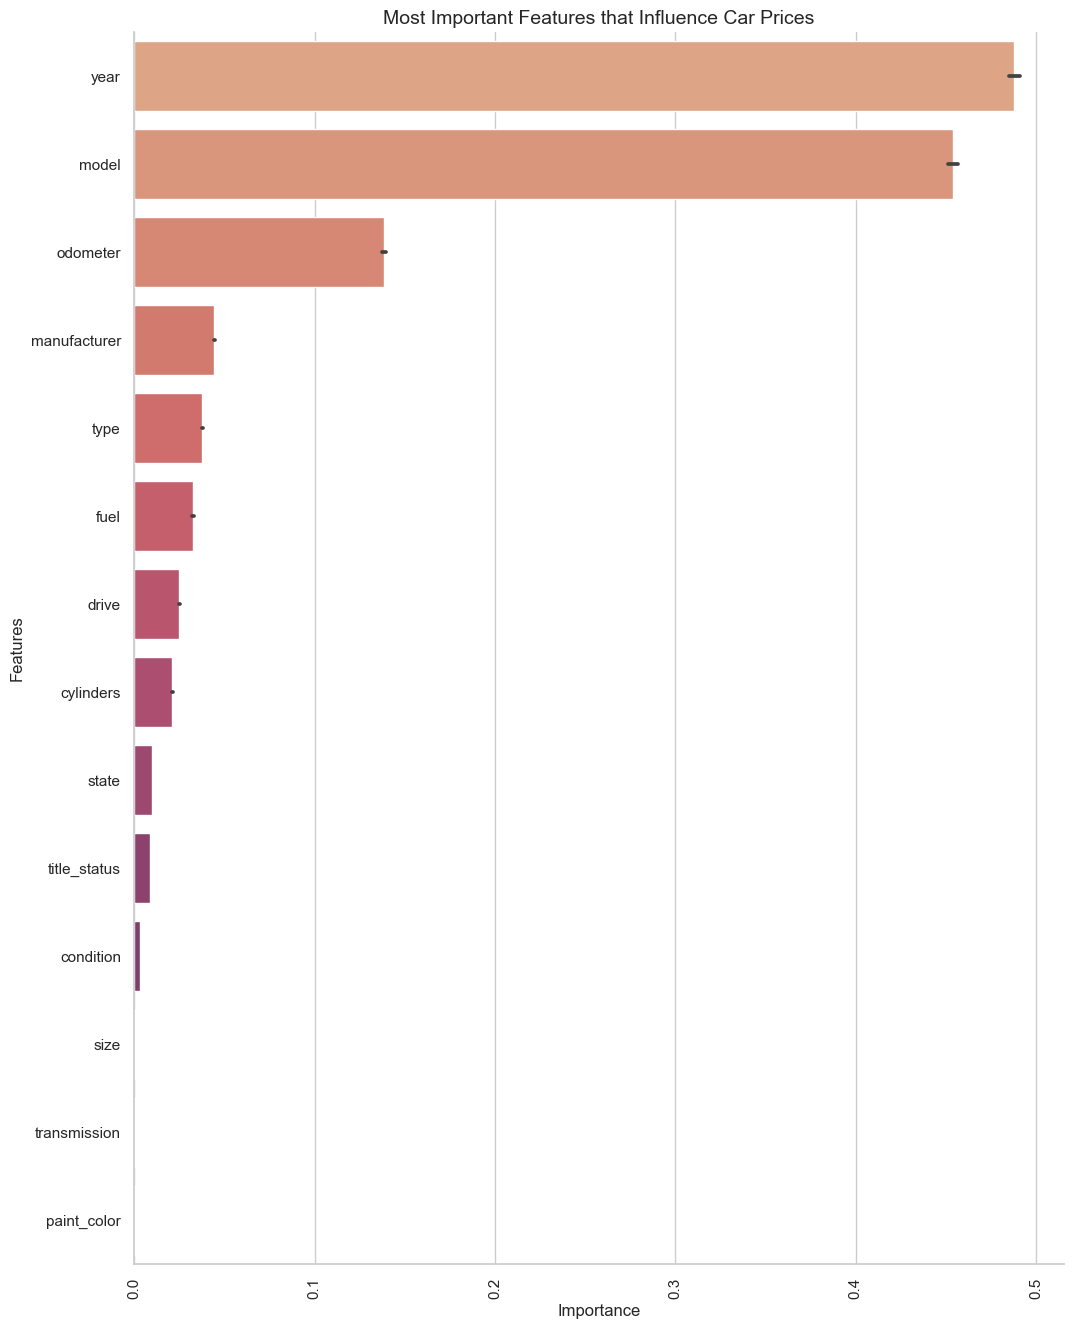

In [455]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 16))
sns.barplot(x=complete_fi['permutation importance'], y=complete_fi['feature'], palette='flare')
plt.title('Most Important Features that Influence Car Prices', fontsize = 14)
plt.xlabel('Importance',fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### Conclusion: Year, Model, and Odometer were the most important features. Year and model were included in my hypothesis, but not odometer. Manufacturer and car type, which were apart of my hypothesis, were the fourth and fifth most important feature, respectively. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Upon the Evaluation, Model, Year,  and Odometer were important features.  My recommendation for the used-car dealership would be to focus on these features for upcoming sales with prospective buyers. I am performing another set of data visualizations of these features but within the new time parameters of 2000-2020. 

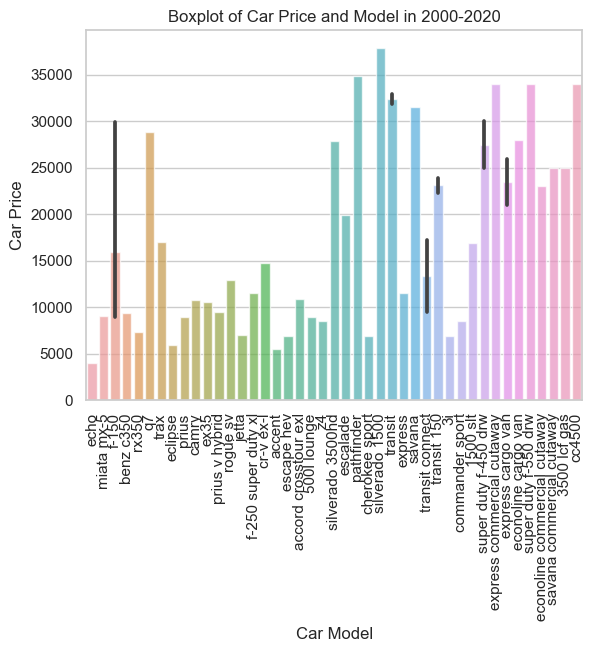

In [415]:
plot_bar(car_df.head(50),'model','price','Car Model','Car Price','Boxplot of Car Price and Model in 2000-2020')

#### These are the current top models for used cars given the new time parameter. 

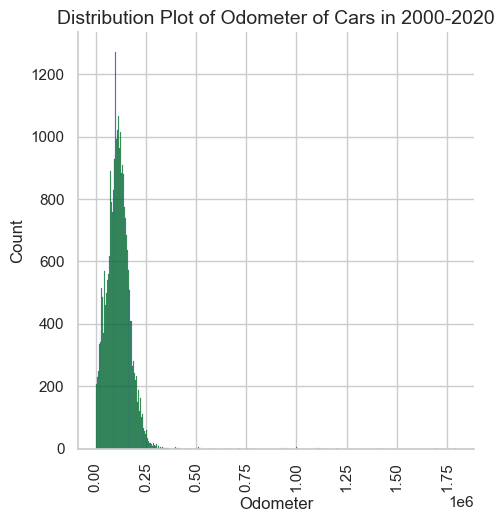

In [461]:
plot_dist(car_df['odometer'], 'Odometer','Distribution Plot of Odometer of Cars in 2000-2020')

#### Odometer ranges from 0.1-0.25e6 are preferrable.

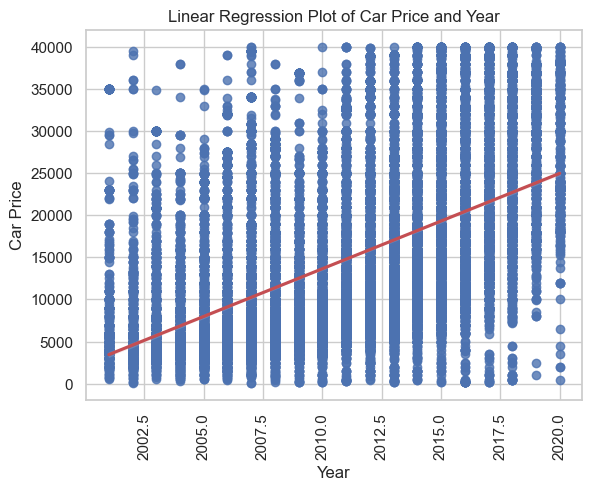

In [420]:
plot_reg(car_df, 'year','price','Year','Car Price','Linear Regression Plot of Car Price and Year')

#### This linear regression plot clearly demonstrates an upward trend in car price and year. This demonstrates that the need for used cars continue to increase. 

## My overall recommendations for the used-cars dealership is to focus on the year and model of the car, as these are the most important features. Secondly, focus on odometer ranges, preferably with a lower range. Marketing efforts should be targeted on these specific features in order to bolster profits and efficiently organize car inventory. These features are most likely what prospective buyers are considering when purchasing a used car.